<a href="https://colab.research.google.com/github/holiday-scott/HackerNewsPostAnalysis/blob/main/Exploring_Hacker_News_Posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Hacker News Posts

[This data set](https://www.kaggle.com/hacker-news/hacker-news-posts) is Hacker News posts from the last 12 months (up to September 26 2016). 

The original data has been reduced to remove any posts which did not receive comments.

- **id**: The unique identifier from Hacker News for the post
- **title**: The title of the post
- **url**: The URL that the posts links to, if the post has a URL
- **num_points**: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
- **num_comments**: The number of comments that were made on the post
- **author**: The username of the person who submitted the post
- **created_at**: The date and time at which the post was submitted

## Problem - Max Engagement?
What kind of post should be published and when should it be published to get maximum engagement?

## Contents
1. Access Data Source
  - 1.1 Inside the Data 
2. Most Engaging Post Type
  - 2.1 Engagement by Most Common Post Type
  - 2.2 Engagement by Comments and Upvotes
3. Time Analysis
  - 3.1 Clean the data
  - 3.2 Convert to DateTime
  - 3.3 Bin the data
  - 3.4 Sort the Bins
  - 3.5 Create the Final Dataset
4. Plot the Data
5. Discussion
  - 5.1 Limitations
  - 5.2 Conclusions



# 1.0 Access Data Source

In [13]:
# Mount Google.
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
#drive.flush_and_unmount()

# Load reader modules
from csv import reader

# Find out where the data is.
#!ls "gdrive/MyDrive/Colab Notebooks/p2/"

### Open Hacker News Dataset ###
opened_file = open('gdrive/MyDrive/Colab Notebooks/p2/HN_posts_year_to_Sep_26_2016.csv')
read_file = reader(opened_file)
hn_dataset = list(read_file)
header = hn_dataset[0]
hn = hn_dataset[1:]

Mounted at /content/gdrive


# 1.1 Inside the Data
The data has a header row, so we'll make two lists:
- hn - the whole dataset, except the header row
- header - the header row

In [14]:
print(header)

for row in hn[0:4]:
  print(row)
  print("\n")

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26']


['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24']


['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19']


['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16']




# 2.0 Most Engaging Post Type

---



Two of the most popular kinds of post at "Ask HN" and "Show HN" posts. So popular, they are the only type on the super-minimal banner.

image.png

Maximum engagement means:
- What are people posting most often? From this is might follow that this is what engages the most.
- How many comments does each post type get?
- How many upvotes does each post type get? 

# 2.1 Engagement by Most Common Post Type

## Q: What types of post are most common?
People tend to post what they themselves want to see. So measuring which post type is most commonly published gives an indication of what will potentially engage users. We might be able to filter out a type of post just because it is statistically irrelevant.

### Method: 
I used the lower() function to make sure case doesn't become a filter. Then the .startswith() method to create a filter resulting in three lists of lists:

1. ask_posts
2. show_posts
3. other_posts

These lists will form the foundation of much of the following analysis.

In [15]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
  title = row[1]
  if title.lower().startswith("ask hn"):
    ask_posts.append(row)
  elif title.lower().startswith("show hn"):
    show_posts.append(row)
  else:
    other_posts.append(row)

print("Total 'Ask HN' posts:", len(ask_posts))
print("Total 'Show HN' posts:", len(show_posts))
print("Total 'Other' posts:", len(other_posts))


Total 'Ask HN' posts: 9139
Total 'Show HN' posts: 10158
Total 'Other' posts: 273822


## A: "Ask HN" and "Show HN"
These post types are, within tolerances, equally frequent on HN.


# 2.2 Engagement by Comments and Upvotes

## Q: What kind of post gets the greatest number of comments and upvotes?
This is a strong measure of engagement, stronger than post type quantity, because it takes effort to interact with the post. After all, we are interested in what the readership thinks is engaging more than what the posters think ought to be engaging.

### Method:
The data contains two counter columns for number of comments and number of upvotes so I will just loop through the **ask_posts** and **show_posts** lists of lists to create a total which I will present as an average.

In [16]:
# Loop through the Ask HN list of lists
# Sum comments (index 4)
ask_comments = 0
ask_upvotes = 0
for row in ask_posts:
  ask_comments += int(row[4])
  ask_upvotes += int(row[3])

# Loop through the Show HN list of lists
# Sum comments (index 4)
show_comments = 0
show_upvotes = 0
for row in show_posts:
  show_comments += int(row[4])
  show_upvotes += int(row[3])

# The length of the list is the number of posts.
print("Average comments on Ask HN posts:", round(ask_comments/len(ask_posts)))
print("Average upvotes on Ask HN posts:", round(ask_upvotes/len(ask_posts)))
print("Average comments on Show HN posts:", round(show_comments/len(show_posts)))
print("Average upvotes on Show HN posts:", round(show_upvotes/len(show_posts)))

Average comments on Ask HN posts: 10
Average upvotes on Ask HN posts: 11
Average comments on Show HN posts: 5
Average upvotes on Show HN posts: 15


### A: Ask HN posts are most engaging
Comments are a better measure of engagement because it takes time to do. Therefore, to override a high comment count, another type would need a very high number of upvotes.

Ask HN posts get double the comments Show HN posts get. Show HN posts get more upvotes, but not by a very significant margin.

Therefore, Ask HN posts get better engagement.



# 3.0 Time Analysis
---
A day is long and all sites have variation in traffic and activity depending on the time of day. While we know we should post an Ask HN post, we also need to know when to post it.



# 3.1 Clean the Data

## Q: Is the data ready for datetime functions?

### Method
Look at the data and get the type for the time column.


In [17]:
print(ask_posts[0][-1])
type(ask_posts[0][-1])


9/26/2016 2:53


str

## A: Unclean
Although the column is consistent with no empty strings, the time and date is a string type and is not in the right format.

# 3.2 Convert to DateTime

### Method
I will use datetime.strptime() to reformat the data point and write it back to the original data.

NB: It would be good practice to append a column, but for simplicity.

In [18]:
# Import the datetime module as an alias.
# dt is the alias for the module
# dt.datetime() is the class itself
import datetime as dt

# Convert the 'created at' column in the dataset to a datetime type.
# Using only the ask_posts list.
for row in ask_posts:
  created_str = row[-1]
  created_dt = dt.datetime.strptime(created_str, "%m/%d/%Y %H:%M")
  row[-1] = created_dt

print(ask_posts[0][-1])
type(ask_posts[0][-1])


2016-09-26 02:53:00


datetime.datetime

We can now see that the created at column is the datetime type

# 3.3 Bin the Data
There are three things we need to track for Ask HN posts:
1. Total posts per hour.
2. Total comments per hour.
3. Total upvotes per hour.

### Method
**Classes** can help make this code more robust and future-proof in the instance HN starts using a different datetime format or we want to change the delta of the bin.

I will therefore:
1. Create a class which:
  - pulls out the required delta from the dataset.
  - creates a frequency dictionary for that bin delta.

NB: Classes are not essential and for this project are perhaps more complex that is required, but the opportunity is there to develop my skills in this important area of Python.

In [19]:
freq_pph = {}
freq_cph = {}
freq_uph = {}

# Creates a binned frequency table:
# - key is bin_minutes (size of bin in minutes).
# - value is freq_value which sums/counts the number of things in that column. 
class BinFreq:
  def __init__(self, dataset, bin_minutes, freq_value, dict_name):
    self.dataset = dataset
    self.bin_minutes = bin_minutes
    self.freq_value = freq_value
    self.dict_name = dict_name
    #self.freq_posts_per_hour = freq_posts_per_hour

  def make_table(self):
    # Sets bin size
    # Counts how of posts in that timedelta
    if (self.bin_minutes == 60) and (self.freq_value == "None"):
      for post in self.dataset:
        hour_dt = post[-1]
        hour_str = hour_dt.strftime("%H")
        if hour_str in self.dict_name:
           self.dict_name[hour_str] += 1
        else:
           self.dict_name[hour_str] = 1
    # Sets bins size
    # Sums the values of a given index/column
    if (self.bin_minutes == 60) and (self.freq_value != "None"):
      for post in self.dataset:
        hour_dt = post[-1]
        hour_str = hour_dt.strftime("%H")
        if hour_str in self.dict_name:
          self.dict_name[hour_str] += int(post[self.freq_value])
        else:
          self.dict_name[hour_str] = int(post[self.freq_value])
    return self.dict_name


# 3.4 Sort the Bins
The bin dictionary is not sorted so it won't be useful for time analysis.

### Method 
The class below sorts the dictionary into ascending time order so we can plot it properly.

sorted() is the builtin function of choice. The resulting tuple is then converted to a dictionary using dict().

In [20]:
sorted_dict = {}

class SortDict:
  def __init__(self, sort_this_dict, desc):
    self.sort_this_dict = sort_this_dict
    self.desc = desc

  # Sorts dictionary in ascending or descending order.
  def sort_dict(self):
    dict_items = self.sort_this_dict.items()
    sorted_tuple = sorted(dict_items)
    sorted_dict = dict(sorted_tuple)
    return sorted_dict 


# 3.5 Create the Final Dataset
The only thing left to do now is instantiate the class and run the method.

In [21]:
## PPH - Posts Per Hour
# Instantiate the class for post frequency.
pph = BinFreq(ask_posts, 60, "None", freq_pph)
pph_dict = pph.make_table()

# Sort the dictionary that is returned.
spph = SortDict(pph_dict, desc=True)
spph_dict = spph.sort_dict()
print(spph_dict)

## CPH - Comments Per Hour
# Instantiate the class for comment frequency.
cph = BinFreq(ask_posts, 60, 4, freq_cph)
cph_dict = cph.make_table()

# Sort the dictionary that is returned.
scph = SortDict(cph_dict, desc=True)
scph_dict = scph.sort_dict()
print(scph_dict)

## UPH - Upvotes Per Hour
# Instantiate the class for upvote frequency.
uph = BinFreq(ask_posts, 60, 3, freq_uph)
uph_dict = uph.make_table()

# Sort the dictionary that is returned.
suph = SortDict(uph_dict, desc=True)
suph_dict = suph.sort_dict()
print(suph_dict)

{'00': 301, '01': 282, '02': 269, '03': 271, '04': 243, '05': 209, '06': 234, '07': 226, '08': 257, '09': 222, '10': 282, '11': 312, '12': 342, '13': 444, '14': 513, '15': 646, '16': 579, '17': 587, '18': 614, '19': 552, '20': 510, '21': 518, '22': 383, '23': 343}
{'00': 2277, '01': 2089, '02': 2996, '03': 2154, '04': 2360, '05': 1838, '06': 1587, '07': 1585, '08': 2362, '09': 1477, '10': 3013, '11': 2797, '12': 4234, '13': 7245, '14': 4972, '15': 18525, '16': 4466, '17': 5547, '18': 4877, '19': 3954, '20': 4462, '21': 4500, '22': 3372, '23': 2297}
{'00': 2835, '01': 2662, '02': 2944, '03': 2539, '04': 2650, '05': 2046, '06': 2030, '07': 2040, '08': 2744, '09': 1763, '10': 3789, '11': 2856, '12': 4643, '13': 7962, '14': 5390, '15': 13978, '16': 5970, '17': 7155, '18': 6850, '19': 4782, '20': 4491, '21': 5042, '22': 3601, '23': 2616}


# 4.0 Plot the Data
After all the data has been put in bins and processed, we have three data sets for Ask HN posts:
1. spph_dict = posts per hour as a sorted dictionary.
2. cpph_dict = comments per hour as a sorted dictionary.
3. upph_dict = upvotes per hour as a sorted dictionary.

##  Q: Can we visualise an optimal time to post?

### Method
matplotlib.pyplot() is the library I will use to create a simple bar chart.

A bar chart is the best choice when using time bins because we want to see the relative frequence compared across three charts.

NB. A grouped bar chart would be better, but I haven't learned how to do that yet.


<BarContainer object of 24 artists>

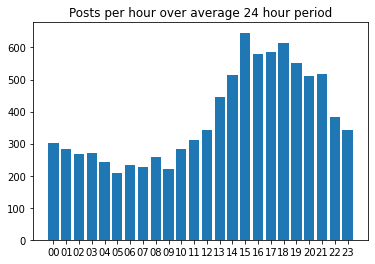

In [22]:
import matplotlib

spph_dict_values = spph_dict.values()
spph_dict_keys = spph_dict.keys()
matplotlib.pyplot.title("Posts per hour over average 24 hour period")
matplotlib.pyplot.bar(spph_dict_keys, spph_dict_values)

<BarContainer object of 24 artists>

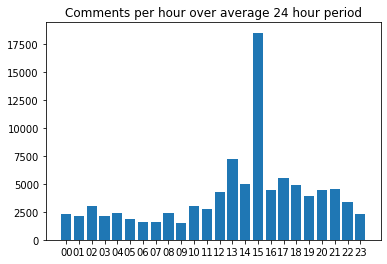

In [23]:
scph_dict_values = scph_dict.values()
scph_dict_keys = scph_dict.keys()
matplotlib.pyplot.title("Comments per hour over average 24 hour period")
matplotlib.pyplot.bar(scph_dict_keys, scph_dict_values)

<BarContainer object of 24 artists>

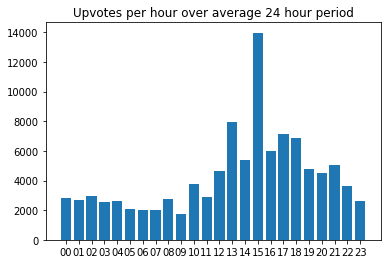

In [24]:
suph_dict_values = suph_dict.values()
suph_dict_keys = suph_dict.keys()
matplotlib.pyplot.title("Upvotes per hour over average 24 hour period")
matplotlib.pyplot.bar(suph_dict_keys, suph_dict_values)

### A: 15:00 may be the optimal time to post
There is clearly a very high surge in site engagement at 15:00.


# 5.0 Discussion

## 5.1 Limitations
### Overfitting
The dataset was filtered down quite quickly for the purposes of a learning and portfolio piece. There are good reasons to re-run the analysis on "Show HN" posts, as well as looking in the large "Other" group.
### Diminishing Returns
It is possible that with such high interaction with "Ask HN" content means that there is no appetite for more. The past is not a good indicaion of future behaviour.
### Content Blindness
There is no sense of the data in the analysis. There could be causal mechanisms driving this surge at 15:00 that are important to post optimisation.
### Outliers 
The 15:00 surge is so big and so rapid that it may be an outlier - the data may be flawed. An analysis of another data set at a different time should be done to investigate this.

## 5.2 Conclusions
It is clear that posting at 15:00 is very likely to get strong engagement.

It is less clear that any kind of post would succeed just because it is posted at this time.

It is less clear that the effect of posting at 15:00 would be strong as the data suggests.